<a href="https://colab.research.google.com/github/prahlad-pallav/Stock_Market_Analysis/blob/main/Index_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To fetch the Nifty 50 historical data, I'll use the `yfinance` library. If you don't have it installed, you can install it by running the following command:

In [8]:
%pip install yfinance

Now I'll fetch the data using the `yfinance` library.

In [9]:
import yfinance as yf

# Fetch Nifty 50 data
nifty50_data = yf.download('^NSEI', period='max')

# Display the first few rows of the data
print(nifty50_data.head())

/tmp/ipython-input-9-2624288101.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty50_data = yf.download('^NSEI', period='max')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI  ^NSEI
Date                                                                 
2007-09-17  4494.649902  4549.049805  4482.850098  4518.450195      0
2007-09-18  4546.200195  4551.799805  4481.549805  4494.100098      0
2007-09-19  4732.350098  4739.000000  4550.250000  4550.250000      0
2007-09-20  4747.549805  4760.850098  4721.149902  4734.850098      0
2007-09-21  4837.549805  4855.700195  4733.700195  4752.950195      0


Now, I'll plot the closing price of Nifty 50 over time using `matplotlib`.

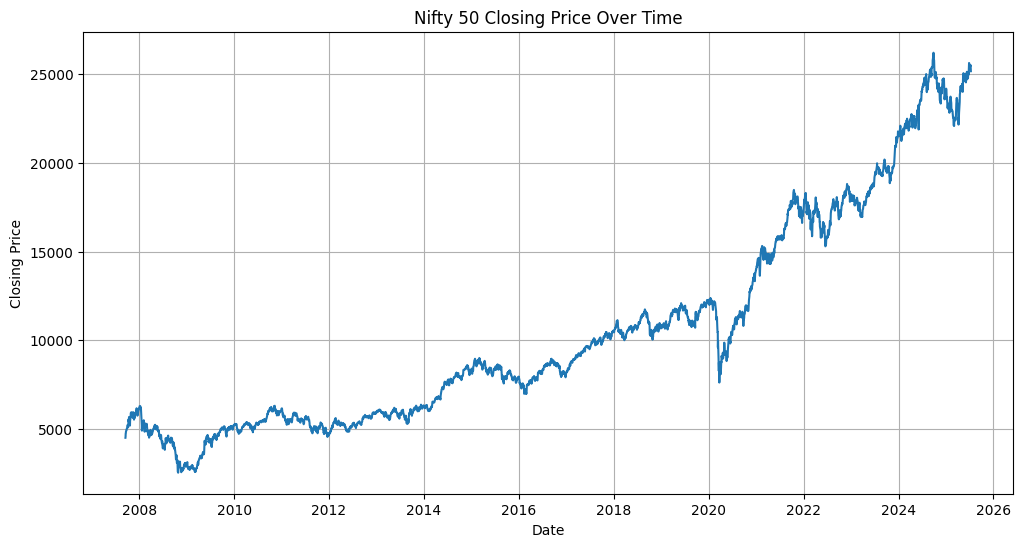

In [11]:
import matplotlib.pyplot as plt

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'])
plt.title('Nifty 50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

**SMA and EMA**

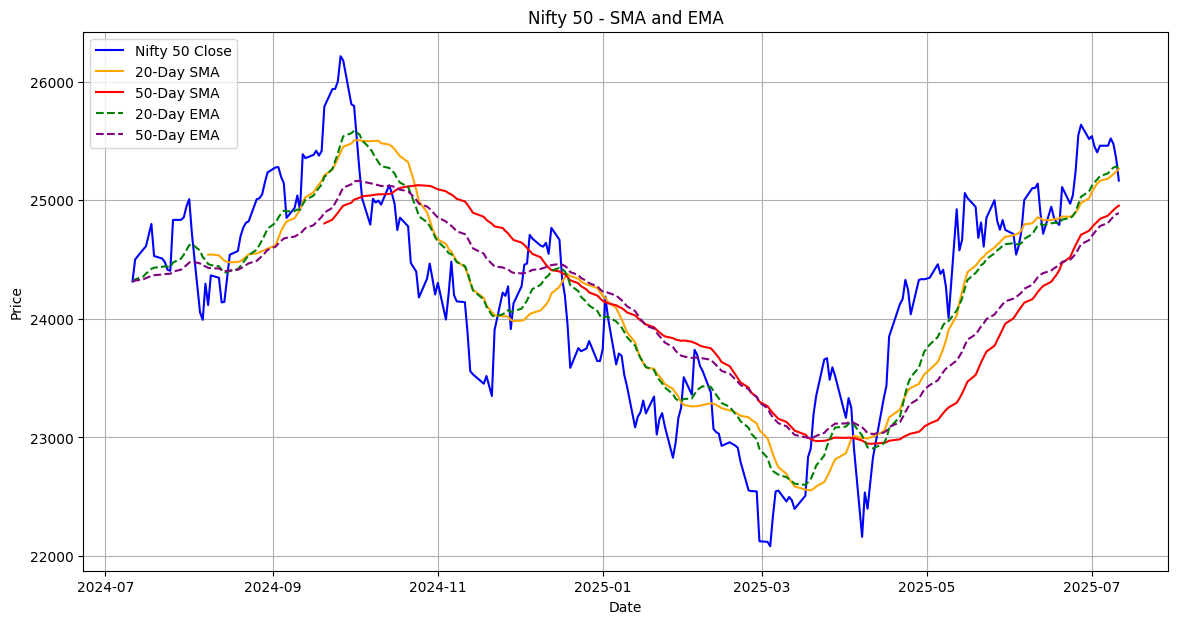

In [24]:
# Calculate Simple Moving Averages (SMA)
nifty_data['SMA_20'] = nifty_data['Close'].rolling(window=20).mean()  # 20-day SMA
nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean()  # 50-day SMA

# Calculate Exponential Moving Averages (EMA)
nifty_data['EMA_20'] = nifty_data['Close'].ewm(span=20, adjust=False).mean()  # 20-day EMA
nifty_data['EMA_50'] = nifty_data['Close'].ewm(span=50, adjust=False).mean()  # 50-day EMA

# Plot closing price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(nifty_data['Close'], label='Nifty 50 Close', color='blue')
plt.plot(nifty_data['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(nifty_data['SMA_50'], label='50-Day SMA', color='red')
plt.plot(nifty_data['EMA_20'], label='20-Day EMA', color='green', linestyle='--')
plt.plot(nifty_data['EMA_50'], label='50-Day EMA', color='purple', linestyle='--')

# Add plot labels and legend
plt.title('Nifty 50 - SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**Bollinger Band**

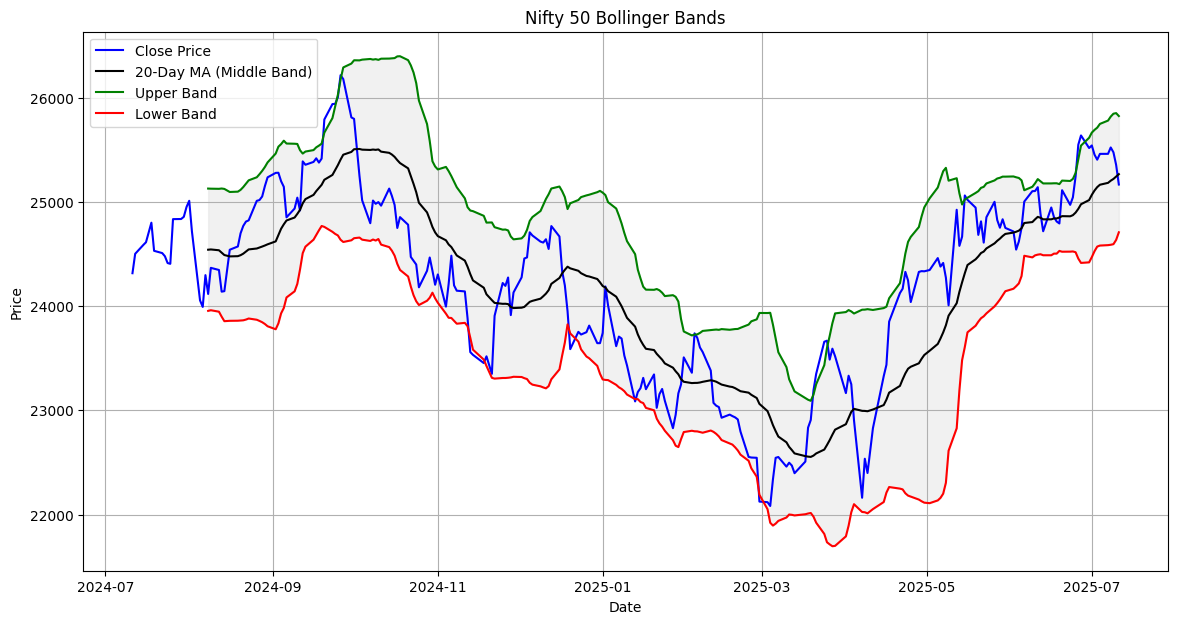

In [25]:
# Calculate 20-day moving average (Middle Band)
nifty_data['MA20'] = nifty_data['Close'].rolling(window=20).mean()

# Calculate 20-day standard deviation
nifty_data['STD20'] = nifty_data['Close'].rolling(window=20).std()

# Calculate Upper and Lower Bollinger Bands
nifty_data['Upper_Band'] = nifty_data['MA20'] + (2 * nifty_data['STD20'])
nifty_data['Lower_Band'] = nifty_data['MA20'] - (2 * nifty_data['STD20'])

# Plot Bollinger Bands with the Close price
plt.figure(figsize=(14, 7))
plt.plot(nifty_data['Close'], label='Close Price', color='blue')
plt.plot(nifty_data['MA20'], label='20-Day MA (Middle Band)', color='black')
plt.plot(nifty_data['Upper_Band'], label='Upper Band', color='green')
plt.plot(nifty_data['Lower_Band'], label='Lower Band', color='red')
plt.fill_between(nifty_data.index, nifty_data['Upper_Band'], nifty_data['Lower_Band'], color='lightgray', alpha=0.3)

# Chart formatting
plt.title('Nifty 50 Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**RSI**

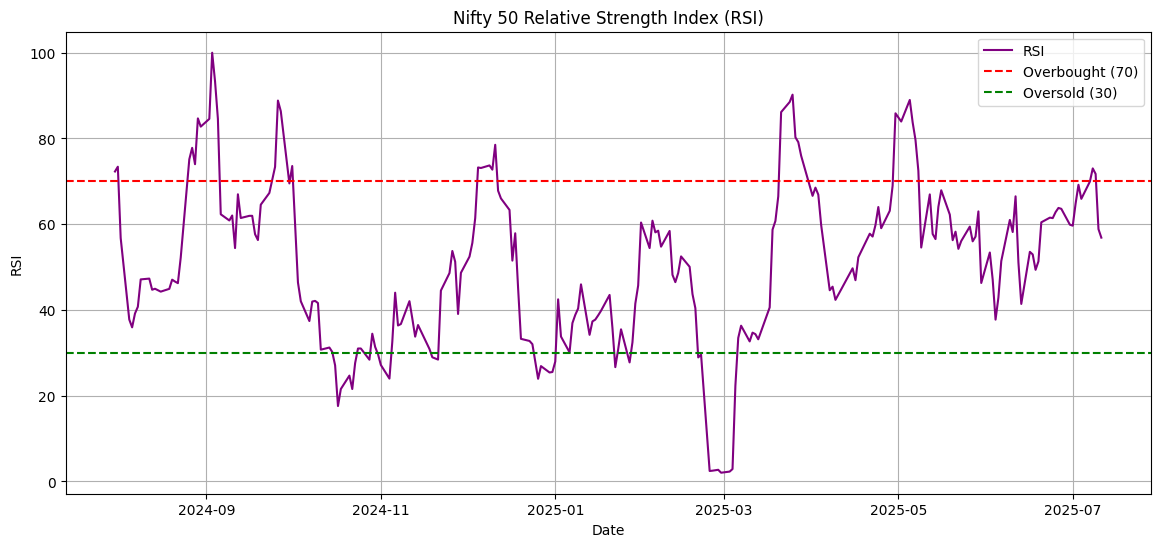

In [26]:
# Calculate daily price change
delta = nifty_data['Close'].diff()

# Separate gains and losses
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Use 14-day rolling window to calculate average gain and loss
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# Calculate Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
rsi = 100 - (100 / (1 + rs))

# Add RSI to the DataFrame
nifty_data['RSI'] = rsi

# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(nifty_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Nifty 50 Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

**MACD**

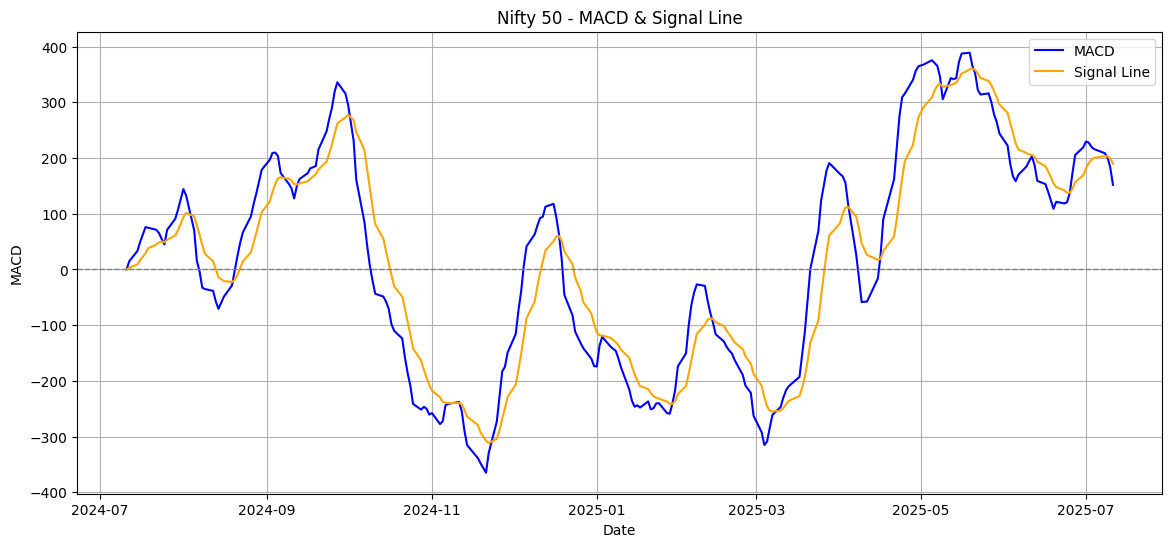

In [28]:
# Calculate the 12-day and 26-day Exponential Moving Averages (EMAs)
ema_12 = nifty_data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = nifty_data['Close'].ewm(span=26, adjust=False).mean()

# MACD Line = EMA12 - EMA26
macd = ema_12 - ema_26

# Signal Line = 9-day EMA of MACD
signal = macd.ewm(span=9, adjust=False).mean()

# Add MACD and Signal to DataFrame
nifty['MACD'] = macd
nifty['Signal'] = signal

# Plot MACD and Signal Line
plt.figure(figsize=(14, 6))
plt.plot(nifty.index, nifty['MACD'], label='MACD', color='blue')
plt.plot(nifty.index, nifty['Signal'], label='Signal Line', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Nifty 50 - MACD & Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

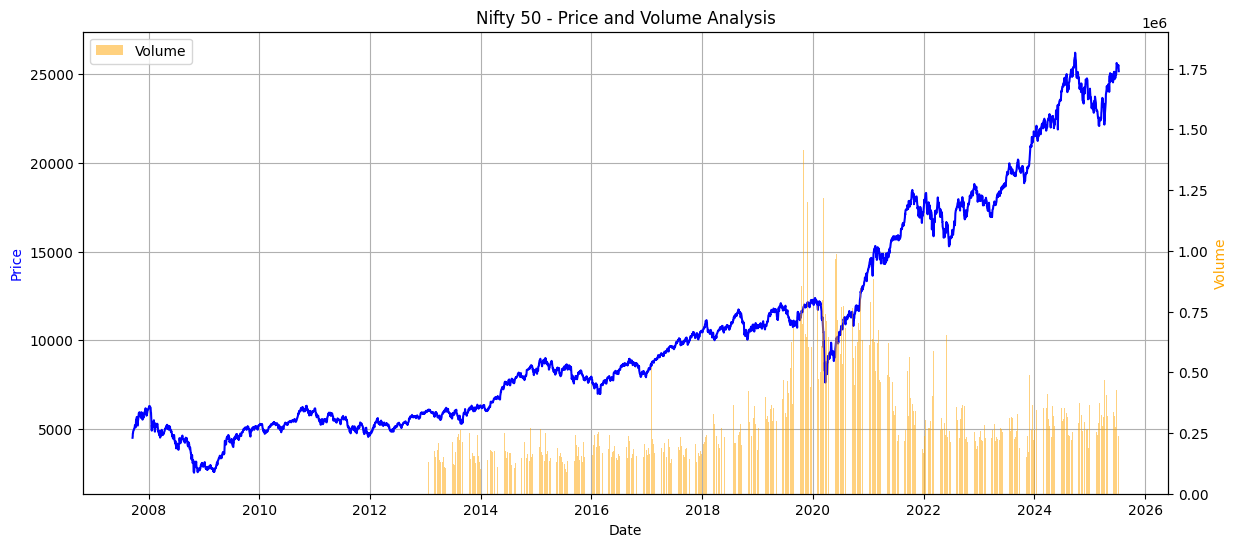

In [37]:
plt.figure(figsize=(14, 6))

# Plot Closing Price on primary y-axis
plt.plot(nifty50_data.index, nifty50_data['Close'].squeeze(), label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price', color='blue')
plt.title('Nifty 50 - Price and Volume Analysis')
plt.grid(True)

# Create a twin y-axis for Volume
ax2 = plt.gca().twinx()
ax2.bar(nifty50_data.index, nifty50_data['Volume'].squeeze(), label='Volume', alpha=0.5, color='orange')
ax2.set_ylabel('Volume', color='orange')

plt.legend(loc='upper left')
plt.show()


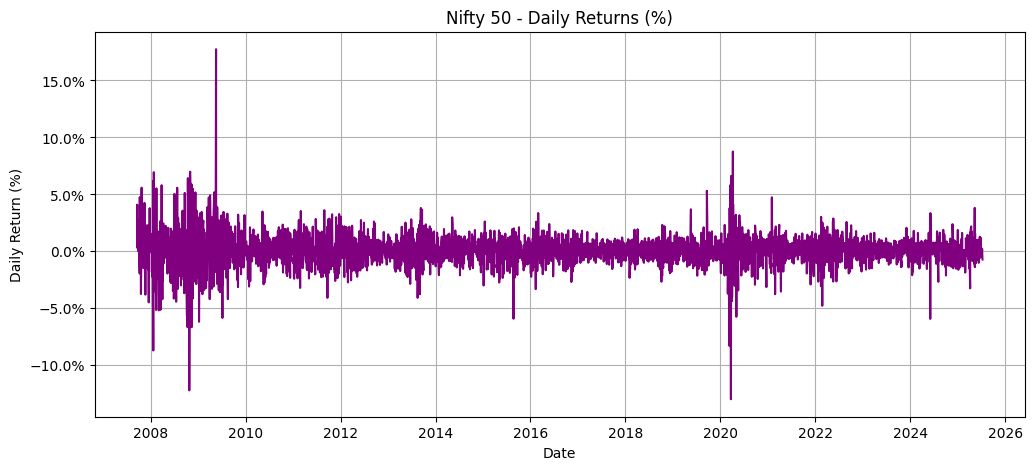

In [39]:
import matplotlib.ticker as mtick

# Calculate daily percentage returns (%)
nifty50_data['Daily Return (%)'] = nifty50_data['Close'].pct_change() * 100

# Plot daily returns in percentage
plt.figure(figsize=(12, 5))
plt.plot(nifty50_data.index, nifty50_data['Daily Return (%)'], color='purple')
plt.title('Nifty 50 - Daily Returns (%)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


**Rolling Volatility**

> Rolling standard deviation gives insight into how volatile the market has been over time (in this case, a 20-day window).



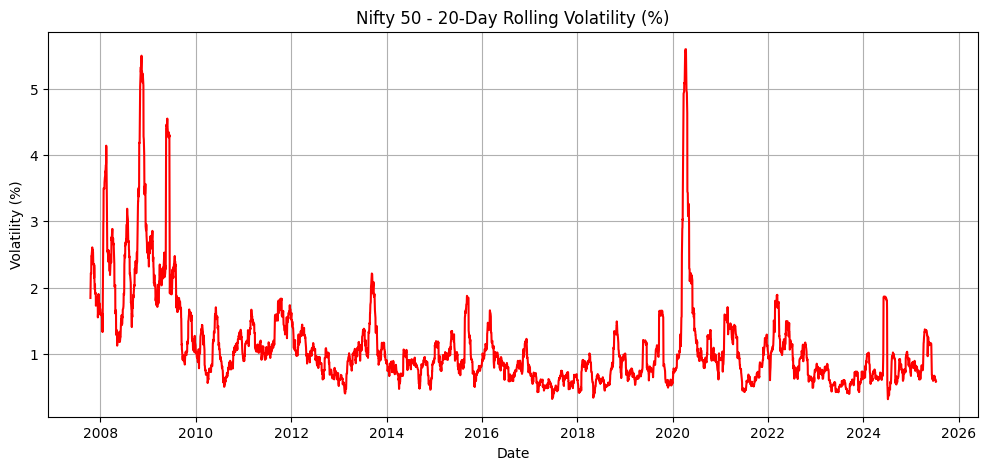

In [41]:
# Calculate rolling volatility (standard deviation) over a 20-day window
nifty50_data['Rolling Volatility (%)'] = nifty50_data['Daily Return'].rolling(window=20).std() * 100

# Plot rolling volatility
plt.figure(figsize=(12, 5))
plt.plot(nifty50_data.index, nifty50_data['Rolling Volatility (%)'], color='red')
plt.title('Nifty 50 - 20-Day Rolling Volatility (%)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.show()